<a href="https://colab.research.google.com/github/thaanirs/DL_codebasics/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets,layers,models 

In [3]:
(X_train,y_train),(X_test,y_test)  = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

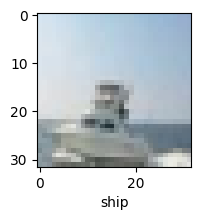

In [16]:
plot_sample(X_train,y_train,100)

In [17]:
X_train = X_train/255
X_test = X_test/255

# ANN model

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.8171 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.6274 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 177s 113ms/step - loss: 1.5436 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.4834 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4341 - accuracy: 0.4937


In [19]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.4514 - accuracy: 0.4889


[1.4513633251190186, 0.48890000581741333]

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report :\n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 10s 32ms/step
classification report :
               precision    recall  f1-score   support

           0       0.63      0.46      0.53      1000
           1       0.60      0.67      0.64      1000
           2       0.39      0.36      0.37      1000
           3       0.37      0.40      0.38      1000
           4       0.35      0.53      0.42      1000
           5       0.41      0.37      0.39      1000
           6       0.61      0.37      0.46      1000
           7       0.51      0.60      0.55      1000
           8       0.56      0.68      0.61      1000
           9       0.65      0.46      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



# CNN model

In [21]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [22]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5113 - accuracy: 0.4511
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1769 - accuracy: 0.5844
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0427 - accuracy: 0.6337
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9547 - accuracy: 0.6676
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8886 - accuracy: 0.6930
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8394 - accuracy: 0.7080
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7957 - accuracy: 0.7240
Epoch 8/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7592 - accuracy: 0.7353
Epoch 9/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.7273 - accuracy: 0.7467
Epoch 10/10
1563/1563 [==============================] - 91s 58m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9072 - accuracy: 0.6991


[0.9072158932685852, 0.6991000175476074]

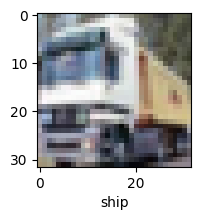

In [24]:
y_test = y_test.reshape(-1)
plot_sample(X_test,y_test,1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 9s 27ms/step


array([[1.9905481e-03, 2.3014891e-05, 1.3627591e-02, 8.5807890e-01,
        4.6514039e-04, 1.9541886e-02, 1.0830925e-02, 1.2715177e-04,
        9.3407601e-02, 1.9072564e-03],
       [2.2744972e-03, 8.3812483e-02, 6.8398469e-07, 2.4515468e-06,
        2.8489023e-07, 3.9531876e-08, 3.2974981e-08, 2.2252317e-08,
        9.0939730e-01, 4.5121023e-03],
       [1.8194254e-01, 1.2045095e-01, 2.1762128e-03, 1.5573159e-02,
        2.5421041e-03, 4.0645359e-04, 3.6836430e-04, 4.0894137e-03,
        6.1364615e-01, 5.8804654e-02],
       [9.3327713e-01, 3.7204113e-03, 6.6028680e-03, 1.5644048e-04,
        1.5694280e-03, 1.1889032e-06, 1.6801236e-05, 1.7125343e-05,
        5.4496620e-02, 1.4184287e-04],
       [1.2308217e-06, 2.3186545e-05, 2.3502219e-03, 1.5671195e-02,
        3.2178488e-02, 5.8633712e-04, 9.4832212e-01, 3.6444053e-06,
        8.5738004e-04, 6.2583345e-06]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [31]:
classes[y_classes[3]]

'airplane'

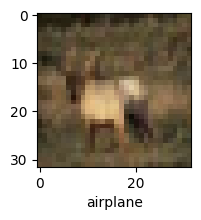

In [32]:
plot_sample(X_test,y_test,3)

In [33]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.86      0.75      0.80      1000
           2       0.62      0.56      0.59      1000
           3       0.52      0.55      0.53      1000
           4       0.64      0.64      0.64      1000
           5       0.63      0.57      0.60      1000
           6       0.74      0.80      0.77      1000
           7       0.74      0.74      0.74      1000
           8       0.80      0.83      0.81      1000
           9       0.70      0.84      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

